In [1]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
import random
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import plot_confusion_matrix
from keras.layers import BatchNormalization
import pandas as pd
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import keras.utils.vis_utils
from importlib import reload
import pydot
reload(keras.utils.vis_utils)
keras.utils.vis_utils.pydot = pydot
from tensorflow.keras.utils import to_categorical
from tabulate import tabulate

In [2]:
(X_train_full, y_train_full), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [3]:
X_train_normal  = X_train_full/255
X_test_normal  = X_test/255

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X_train_normal, y_train_full, test_size=0.15, random_state = 20)

In [5]:
y_train_onehot = to_categorical(y_train, 10)
y_test_onehot = to_categorical(y_test, 10)
y_val_onehot = to_categorical(y_val, 10)

In [6]:
np.random.seed(0)
tf.random.set_seed(0)

In [7]:
def plot(x):
    
    loss = model_history.history.copy()
    loss.pop('accuracy')
    loss.pop('val_accuracy')
    acc = model_history.history.copy()
    acc.pop('loss')
    acc.pop('val_loss')
    
    pd.DataFrame(loss).plot(figsize=(8,5))
    plt.grid(True)
    plt.show()
    
    pd.DataFrame(acc).plot(figsize=(8,5))
    plt.grid(True)
    plt.ylim(0,1)
    plt.show()

In [8]:
model = keras.models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
opt = tf.keras.optimizers.SGD(lr=0.001, momentum=0.9)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


# **Part A**
### **Train data: 70%, Test data: 15%, Validation data: 15%**

### **Architecture of model**

In [17]:
data = [["conv2d", 32,(3,3),"relu"],["batch_normalization","","",""], ["conv2d_1", 32,(3,3),"relu"], ["batch_normalization_1","","",""], ["max_pooling2d","",(2,2),""],
        ["dropout",0.2,"",""], ["conv2d_2",64,(3,3),"relu"],["batch_normalization_2","","",""], ["conv2d_3",64,(3,3),"relu"],["batch_normalization_3","","",""], ["max_pooling2d_1","",(2,2),""],
        ["dropout_1 ",0.3,"",""], ["conv2d_4",128,(3,3),"relu"],["batch_normalization_4","","",""],["conv2d_5",128,(3,3),"relu"],["batch_normalization_5 ","","",""],["max_pooling2d_2 ","",(2,2),""],
        ["dropout_2",0.4,"",""],["flatten ","","",""], ["dense ",128,"","relu"],["batch_normalization_6 ","","",""],["dropout_3 ",0.5,"",""],["dense_1 ",10,"","softmax"]]

col_names = ["layers", "number of neurons", "kernel","activation function"]
print(tabulate(data, headers=col_names))

layers                 number of neurons    kernel    activation function
---------------------  -------------------  --------  ---------------------
conv2d                 32                   (3, 3)    relu
batch_normalization
conv2d_1               32                   (3, 3)    relu
batch_normalization_1
max_pooling2d                               (2, 2)
dropout                0.2
conv2d_2               64                   (3, 3)    relu
batch_normalization_2
conv2d_3               64                   (3, 3)    relu
batch_normalization_3
max_pooling2d_1                             (2, 2)
dropout_1              0.3
conv2d_4               128                  (3, 3)    relu
batch_normalization_4
conv2d_5               128                  (3, 3)    relu
batch_normalization_5
max_pooling2d_2                             (2, 2)
dropout_2              0.4
flatten
dense                  128                            relu
batch_normalization_6
dropout_3              0.5
dense_1         

## **Output layer**:
#### **Activation function**: Softmax. Because SoftMax outputs its probability for each class, and it is the most appropriate function of the activation function.
#### **Number of neurons**: 10. Because there are 10 classes.
#### **Cost function**: categorical_crossentropy. categorical_crossentropy is a cost function used for classification and other functions do not perform well.
#### **Learning rate**:0.001.
#### **Optimizer**: SGD.

# **Part B**

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True)

In [12]:
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model_history = model.fit(X_train, y_train_onehot, epochs=100, batch_size = 32, validation_data=(X_val, y_val_onehot), callbacks = [callback])

Epoch 1/100
1329/1329 [==============================] - 21s 9ms/step - loss: 1.8943 - accuracy: 0.3513 - val_loss: 1.4541 - val_accuracy: 0.4749
Epoch 2/100
1329/1329 [==============================] - 11s 8ms/step - loss: 1.4392 - accuracy: 0.4800 - val_loss: 1.3378 - val_accuracy: 0.5131
Epoch 3/100
1329/1329 [==============================] - 10s 7ms/step - loss: 1.3045 - accuracy: 0.5294 - val_loss: 1.2323 - val_accuracy: 0.5465
Epoch 4/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.2043 - accuracy: 0.5721 - val_loss: 1.1085 - val_accuracy: 0.6005
Epoch 5/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.1373 - accuracy: 0.5960 - val_loss: 1.0615 - val_accuracy: 0.6195
Epoch 6/100
1329/1329 [==============================] - 10s 8ms/step - loss: 1.0746 - accuracy: 0.6195 - val_loss: 1.0387 - val_accuracy: 0.6257
Epoch 7/100
1329/1329 [==============================] - 10s 7ms/step - loss: 1.0225 - accuracy: 0.6399 - val_loss: 1.0242 -

# **Part C**

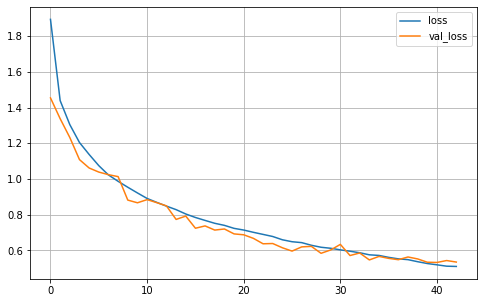

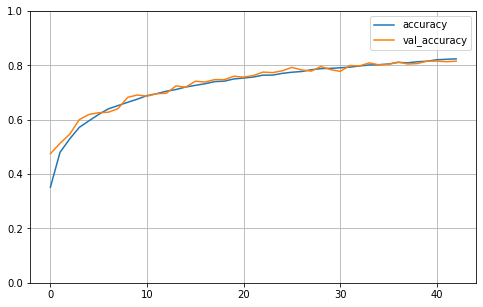

In [14]:
plot(model_history.history)

313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Confusion Matrix')

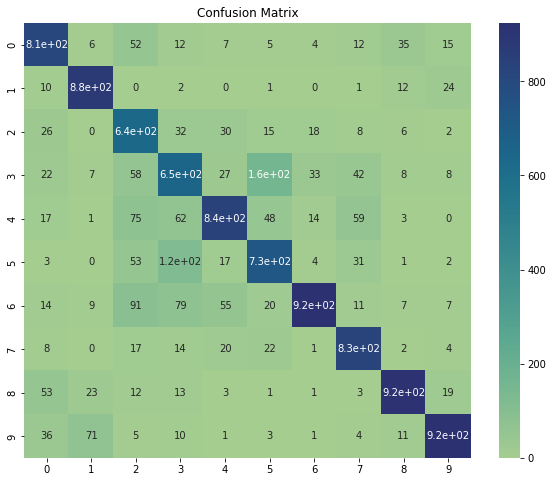

In [15]:
import seaborn as sns
predict_x=model.predict(X_test_normal)
predictions=np.argmax(predict_x,axis=1) 

plt.figure(figsize=(10,8))
conf_mat = confusion_matrix(predictions.tolist(), y_test.tolist())
sns.heatmap(conf_mat, annot=True, cmap='crest')
plt.title('Confusion Matrix')